* Project: To create simple RNN
* Data source: Creating data for this RNN

## Importing Libraries/Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch import nn

## Creating and Visualizing data

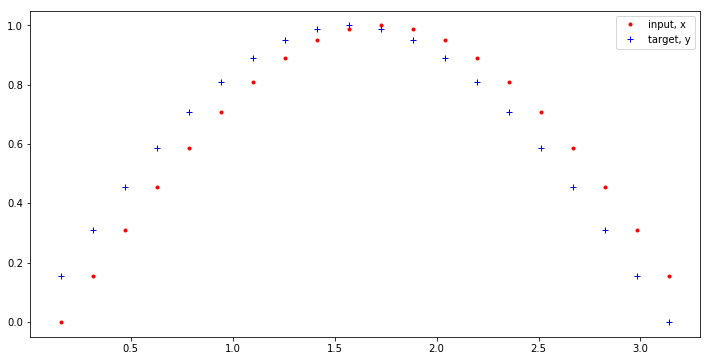

In [25]:
# Creating 20 evenly spaced data points
data_points = np.linspace(0, np.pi, 21)
data = np.sin(data_points)

# Converting into vector
data.resize(21,1)
# inputs and targets
inputs = data[:-1]
targets = data[1:]

# Visualizing the data
plt.figure(figsize=(12,6))
plt.plot(data_points[1:], inputs, 'r.', label='input, x') # x
plt.plot(data_points[1:], targets, 'b+', label='target, y') # y

plt.legend(loc='best')
plt.show()

## Defining the RNN

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim=hidden_dim
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True) # defining RNN
        # batch_first means that the first dim of the input and output will be the batch_size
        self.fc = nn.Linear(hidden_dim, output_size) # last, fully-connected layer

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)
        
        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)  
        
        # get final output 
        output = self.fc(r_out)
        
        return output, hidden